In [36]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import bayesianoptimization as b
import tpeoptimization as t
from hyperopt import hp

import matplotlib.pyplot as plt

import os
os.environ['KBUCKET_CACHE_DIR'] = '/disk/scratch/mhennig/sha1-cache-mhennig'

from spikeforest import SFMdaRecordingExtractor, SFMdaSortingExtractor
from mountaintools import client as mt

# import a spike sorter from the spikesorters module of spikeforest
from spikesorters import Mountainsort4Sorter, HerdingspikesSorter
import shutil

# Configure to download from the public spikeforest kachery node
mt.configDownloadFrom('spikeforest.public')

import numpy as np


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Load recording...


(-12.109856630824373,
 12.109856630824371,
 -15.415176600441502,
 323.4151766004415)

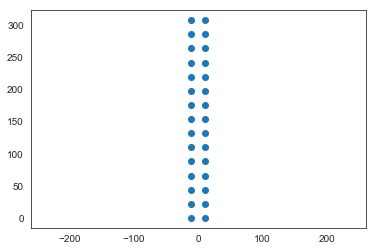

In [37]:
# SYNTH_VISAPY
# mea_c30 set 1
recdir = 'sha1dir://ed0fe4de4ef2c54b7c9de420c87f9df200721b24.synth_visapy/mea_c30/set1'

#synth_bionet_static static_8x_A_2A
# recdir = 'sha1dir://abc900f5cd62436e7c89d914c9f36dcd7fcca0e7.synth_bionet/bionet_static/static_8x_A_2A'

# synth_magland_noise10_K10_C4
# tetrode
# recdir = 'sha1dir://fb52d510d2543634e247e0d2d1d4390be9ed9e20.synth_magland/datasets_noise10_K10_C4/001_synth'

print('Load recording...')
recording = SFMdaRecordingExtractor(dataset_directory=recdir, download=True)
sorting_true = SFMdaSortingExtractor(firings_file=recdir + '/firings_true.mda')

cl=np.array(recording.get_channel_locations(recording.get_channel_ids()))
plt.figure()
plt.scatter(cl[:,0], cl[:,1])
plt.axis('equal')


In [3]:


sorter = 'herdingspikes'

space = {'clustering_bandwidth': hp.uniform('clustering_bandwidth', 3, 15),
    'clustering_alpha': hp.uniform('clustering_alpha', 3, 10),
    'detection_threshold': hp.qnormal('detection_threshold', 18, 7, 1),
    'ahpthr': hp.quniform('ahpthr', -30, 30, 1),
    'probe_inner_radius':hp.quniform('probe_inner_radius',60,90,1),
         'probe_neighbor_radius':hp.quniform('probe_neighbor_radius',70,100,1),
         'probe_event_length':hp.uniform('probe_event_length',0.15,0.30),
    'maa': hp.quniform('maa',0,10,1)
#     'pca_ncomponents': hp.quniform('pca_ncomponents', 1, 5, 1),
#          'filter':hp.choice('filter',['True','False']),
#          'pre_scale_value': hp.uniform('pre_scale_value',20,25)
        }

params = {     'clustering_bandwidth': (5., 22.),
                'clustering_alpha': (1., 12.),
               'detection_threshold': (10, 30),

              'probe_inner_radius': (60,90),
             'probe_neighbor_radius': (75,100),
              'probe_event_length': (0.15,0.30),
             'ahpthr': (-30, 30),
             'maa': (0,10)
#               'pca_ncomponents': (1, 4),
#            'pre_scale_value':(20.,21.),
#           'filter':(['True','False'])
                       } 


In [4]:
# test = b.BayesianOptimization(sorter=sorter, recording=recording, gt_sorting=sorting_true, params_to_opt=params, 
#                               run_schedule=[20, 20],
#                               metric ='accuracy', recdir = recdir, outfile = 'res')

test = t.TPEOptimization(sorter=sorter, recording=recording, gt_sorting=sorting_true, params_to_opt=params, 
                              space=space, run_schedule=[30, 30],
                              metric ='accuracy', recdir = recdir, outfile = 'res')



In [5]:
test.run()


chosen values:                                      
{'ahpthr': -18.0, 'clustering_alpha': 4.210081220278397, 'clustering_bandwidth': 12.789785533183142, 'detection_threshold': 13.0, 'maa': 9.0, 'probe_event_length': 0.27867572496307835, 'probe_inner_radius': 68.0, 'probe_neighbor_radius': 99.0}
Clustering spikes with parameters: {'ahpthr': -18.0, 'clustering_alpha': 4.210081220278397, 'clustering_bandwidth': 12.789785533183142, 'detection_threshold': 13.0, 'maa': 9.0, 'probe_event_length': 0.27867572496307835, 'probe_inner_radius': 68.0, 'probe_neighbor_radius': 99.0}
# Generating new position and neighbor files from data file
# Not Masking any Channels                          
# Sampling rate: 32000                              
# Localization On                                   
# Number of recorded channels: 30                   
# Analysing frames: 9600000; Seconds: 300.0         
# Frames before spike in cutout: 6                  
# Frames after spike in cutout: 32            

[Parallel(n_jobs=24)]: Using backend LokyBackend with 24 concurrent workers.



Number of estimated units:                          
1                                                   
Saving to                                           
/disk/scratch/mhennig/spikeinterface/spikeoptimizer-develop/optimization_0/HS2_sorted.hdf5
  0%|          | 0/30 [00:17<?, ?it/s, best loss: ?]

[Parallel(n_jobs=24)]: Done   3 out of  24 | elapsed:    2.2s remaining:   15.3s

[Parallel(n_jobs=24)]: Done  16 out of  24 | elapsed:    2.2s remaining:    1.1s

[Parallel(n_jobs=24)]: Done  24 out of  24 | elapsed:    2.3s finished



score:                                              
-0.0                                                
chosen values:                                                 
{'ahpthr': 7.0, 'clustering_alpha': 7.865268981793483, 'clustering_bandwidth': 9.049165596643554, 'detection_threshold': 10.0, 'maa': 4.0, 'probe_event_length': 0.1625437242960169, 'probe_inner_radius': 73.0, 'probe_neighbor_radius': 86.0}
Clustering spikes with parameters: {'ahpthr': 7.0, 'clustering_alpha': 7.865268981793483, 'clustering_bandwidth': 9.049165596643554, 'detection_threshold': 10.0, 'maa': 4.0, 'probe_event_length': 0.1625437242960169, 'probe_inner_radius': 73.0, 'probe_neighbor_radius': 86.0}
  3%|▎         | 1/30 [00:21<10:28, 21.68s/it, best loss: -0.0]

/disk/scratch/mhennig/miniconda3/envs/spikesorting/lib/python3.7/site-packages/spiketoolkit/comparison/groundtruthcomparison.py:333: RuntimeWarning: invalid value encountered in long_scalars
  perf['precision'] = tp / (tp + fp)

/disk/scratch/mhennig/miniconda3/envs/spikesorting/lib/python3.7/site-packages/spiketoolkit/comparison/groundtruthcomparison.py:334: RuntimeWarning: invalid value encountered in long_scalars
  perf['false_discovery_rate'] = fp / (tp + fp)



# Generating new position and neighbor files from data file    
# Not Masking any Channels                                     
# Sampling rate: 32000                                         
# Localization On                                              
# Number of recorded channels: 30                              
# Analysing frames: 9600000; Seconds: 300.0                    
# Frames before spike in cutout: 6                             
# Frames after spike in cutout: 32                             
# tcuts: 51 77                                                 
# tInc: 1000000                                                
# Analysing frames from -51 to 1000077  (0.0%)                 
# Analysing frames from 999949 to 2000077  (10.4%)             
# Analysing frames from 1999949 to 3000077  (20.8%)            
# Analysing frames from 2999949 to 4000077  (31.2%)            
# Analysing frames from 3999949 to 5000077  (41.7%)            
# Analysing frames from 4999949 to 60000

[Parallel(n_jobs=24)]: Using backend LokyBackend with 24 concurrent workers.

[Parallel(n_jobs=24)]: Done   3 out of  24 | elapsed:    2.4s remaining:   17.0s

[Parallel(n_jobs=24)]: Done  16 out of  24 | elapsed:    2.6s remaining:    1.3s



Number of estimated units:                                     
19                                                             
Saving to                                                      
/disk/scratch/mhennig/spikeinterface/spikeoptimizer-develop/optimization_1/HS2_sorted.hdf5
  3%|▎         | 1/30 [00:42<10:28, 21.68s/it, best loss: -0.0]

[Parallel(n_jobs=24)]: Done  24 out of  24 | elapsed:    2.7s finished



score:                                                         
-0.5556911809581935                                            
chosen values:                                                                
{'ahpthr': -28.0, 'clustering_alpha': 6.712539281745661, 'clustering_bandwidth': 10.149873963552881, 'detection_threshold': 18.0, 'maa': 8.0, 'probe_event_length': 0.27434794063531565, 'probe_inner_radius': 74.0, 'probe_neighbor_radius': 83.0}
Clustering spikes with parameters: {'ahpthr': -28.0, 'clustering_alpha': 6.712539281745661, 'clustering_bandwidth': 10.149873963552881, 'detection_threshold': 18.0, 'maa': 8.0, 'probe_event_length': 0.27434794063531565, 'probe_inner_radius': 74.0, 'probe_neighbor_radius': 83.0}
# Generating new position and neighbor files from data file                   
# Not Masking any Channels                                                    
# Sampling rate: 32000                                                        
# Localization On                

/disk/scratch/mhennig/miniconda3/envs/spikesorting/lib/python3.7/site-packages/herdingspikes/hs2.py:164: UserWarning: Loading an empty file /disk/scratch/mhennig/spikeinterface/spikeoptimizer-develop/optimization_2/HS2_detected.bin . This usually happens when no spikes weredetected due to the detection parameters being set too strictly
  "strictly".format(file_name)



# Generating new position and neighbor files from data file                   
# Not Masking any Channels                                                    
# Sampling rate: 32000                                                        
# Localization On                                                             
# Number of recorded channels: 30                                             
# Analysing frames: 9600000; Seconds: 300.0                                   
# Frames before spike in cutout: 6                                            
# Frames after spike in cutout: 32                                            
# tcuts: 51 77                                                                
# tInc: 1000000                                                               
# Analysing frames from -51 to 1000077  (0.0%)                                
# Analysing frames from 999949 to 2000077  (10.4%)                            
# Analysing frames from 1999949 to 3000077  (20.8%) 

[Parallel(n_jobs=24)]: Using backend LokyBackend with 24 concurrent workers.



Number of estimated units:                                                    
13                                                                            
 10%|█         | 3/30 [01:42<11:09, 24.80s/it, best loss: -0.5556911809581935]

[Parallel(n_jobs=24)]: Done   3 out of  24 | elapsed:    2.4s remaining:   16.9s

[Parallel(n_jobs=24)]: Done  16 out of  24 | elapsed:    2.5s remaining:    1.2s

[Parallel(n_jobs=24)]: Done  24 out of  24 | elapsed:    2.6s finished



Saving to                                                                     
/disk/scratch/mhennig/spikeinterface/spikeoptimizer-develop/optimization_3/HS2_sorted.hdf5
score:                                                                        
-0.36250853630776236                                                          
chosen values:                                                                
{'ahpthr': 11.0, 'clustering_alpha': 3.9241946799498066, 'clustering_bandwidth': 12.591626909218988, 'detection_threshold': 13.0, 'maa': 4.0, 'probe_event_length': 0.29452956565275784, 'probe_inner_radius': 67.0, 'probe_neighbor_radius': 91.0}
Clustering spikes with parameters: {'ahpthr': 11.0, 'clustering_alpha': 3.9241946799498066, 'clustering_bandwidth': 12.591626909218988, 'detection_threshold': 13.0, 'maa': 4.0, 'probe_event_length': 0.29452956565275784, 'probe_inner_radius': 67.0, 'probe_neighbor_radius': 91.0}
# Generating new position and neighbor files from data file           

[Parallel(n_jobs=24)]: Using backend LokyBackend with 24 concurrent workers.

[Parallel(n_jobs=24)]: Done   3 out of  24 | elapsed:    2.7s remaining:   18.7s

[Parallel(n_jobs=24)]: Done  16 out of  24 | elapsed:    2.7s remaining:    1.4s

[Parallel(n_jobs=24)]: Done  24 out of  24 | elapsed:    2.9s finished



Number of estimated units:                                                    
10                                                                            
Saving to                                                                     
/disk/scratch/mhennig/spikeinterface/spikeoptimizer-develop/optimization_4/HS2_sorted.hdf5
score:                                                                        
-0.43866643837291786                                                          
chosen values:                                                                
{'ahpthr': 6.0, 'clustering_alpha': 8.491844265665234, 'clustering_bandwidth': 13.825559149804892, 'detection_threshold': 25.0, 'maa': 0.0, 'probe_event_length': 0.2835186431588387, 'probe_inner_radius': 83.0, 'probe_neighbor_radius': 95.0}
Clustering spikes with parameters: {'ahpthr': 6.0, 'clustering_alpha': 8.491844265665234, 'clustering_bandwidth': 13.825559149804892, 'detection_threshold': 25.0, 'maa': 0.0, 'probe_event_length

[Parallel(n_jobs=24)]: Using backend LokyBackend with 24 concurrent workers.

[Parallel(n_jobs=24)]: Done   3 out of  24 | elapsed:    2.9s remaining:   20.5s

[Parallel(n_jobs=24)]: Done  16 out of  24 | elapsed:    3.0s remaining:    1.5s



Number of estimated units:                                                    
11                                                                            
Saving to                                                                     
/disk/scratch/mhennig/spikeinterface/spikeoptimizer-develop/optimization_5/HS2_sorted.hdf5
 17%|█▋        | 5/30 [02:36<10:44, 25.78s/it, best loss: -0.5556911809581935]

[Parallel(n_jobs=24)]: Done  24 out of  24 | elapsed:    3.1s finished



score:                                                                        
-0.32713093838699503                                                          
chosen values:                                                                
{'ahpthr': 17.0, 'clustering_alpha': 9.146879614142524, 'clustering_bandwidth': 6.833699790317603, 'detection_threshold': 10.0, 'maa': 6.0, 'probe_event_length': 0.21982206729811388, 'probe_inner_radius': 89.0, 'probe_neighbor_radius': 83.0}
Clustering spikes with parameters: {'ahpthr': 17.0, 'clustering_alpha': 9.146879614142524, 'clustering_bandwidth': 6.833699790317603, 'detection_threshold': 10.0, 'maa': 6.0, 'probe_event_length': 0.21982206729811388, 'probe_inner_radius': 89.0, 'probe_neighbor_radius': 83.0}
# Generating new position and neighbor files from data file                   
# Not Masking any Channels                                                    
# Sampling rate: 32000                                                        
# Local

[Parallel(n_jobs=24)]: Using backend LokyBackend with 24 concurrent workers.

[Parallel(n_jobs=24)]: Done   3 out of  24 | elapsed:    3.5s remaining:   24.6s

[Parallel(n_jobs=24)]: Done  16 out of  24 | elapsed:    3.6s remaining:    1.8s



Number of estimated units:                                                    
29                                                                            
Saving to                                                                     
/disk/scratch/mhennig/spikeinterface/spikeoptimizer-develop/optimization_6/HS2_sorted.hdf5
 20%|██        | 6/30 [03:03<10:15, 25.65s/it, best loss: -0.5556911809581935]

[Parallel(n_jobs=24)]: Done  24 out of  24 | elapsed:    3.8s finished



score:                                                                        
-0.7651160904938238                                                           
chosen values:                                                                
{'ahpthr': 8.0, 'clustering_alpha': 9.14491976577961, 'clustering_bandwidth': 14.086911439075726, 'detection_threshold': 8.0, 'maa': 6.0, 'probe_event_length': 0.19826038706210444, 'probe_inner_radius': 68.0, 'probe_neighbor_radius': 95.0}
Clustering spikes with parameters: {'ahpthr': 8.0, 'clustering_alpha': 9.14491976577961, 'clustering_bandwidth': 14.086911439075726, 'detection_threshold': 8.0, 'maa': 6.0, 'probe_event_length': 0.19826038706210444, 'probe_inner_radius': 68.0, 'probe_neighbor_radius': 95.0}
# Generating new position and neighbor files from data file                   
# Not Masking any Channels                                                    
# Sampling rate: 32000                                                        
# Localizat

[Parallel(n_jobs=24)]: Using backend LokyBackend with 24 concurrent workers.

[Parallel(n_jobs=24)]: Done   3 out of  24 | elapsed:    3.3s remaining:   23.0s

[Parallel(n_jobs=24)]: Done  16 out of  24 | elapsed:    3.4s remaining:    1.7s



Number of estimated units:                                                    
14                                                                            
Saving to                                                                     
/disk/scratch/mhennig/spikeinterface/spikeoptimizer-develop/optimization_7/HS2_sorted.hdf5
 23%|██▎       | 7/30 [03:32<10:17, 26.87s/it, best loss: -0.7651160904938238]

[Parallel(n_jobs=24)]: Done  24 out of  24 | elapsed:    3.5s finished



score:                                                                        
-0.40608948112856397                                                          
chosen values:                                                                
{'ahpthr': -17.0, 'clustering_alpha': 8.250778247546556, 'clustering_bandwidth': 13.239305922329981, 'detection_threshold': 21.0, 'maa': 9.0, 'probe_event_length': 0.17887045117607805, 'probe_inner_radius': 81.0, 'probe_neighbor_radius': 92.0}
Clustering spikes with parameters: {'ahpthr': -17.0, 'clustering_alpha': 8.250778247546556, 'clustering_bandwidth': 13.239305922329981, 'detection_threshold': 21.0, 'maa': 9.0, 'probe_event_length': 0.17887045117607805, 'probe_inner_radius': 81.0, 'probe_neighbor_radius': 92.0}
# Generating new position and neighbor files from data file                   
# Not Masking any Channels                                                    
# Sampling rate: 32000                                                        
# L

[Parallel(n_jobs=24)]: Using backend LokyBackend with 24 concurrent workers.

[Parallel(n_jobs=24)]: Done   3 out of  24 | elapsed:    3.1s remaining:   21.9s

[Parallel(n_jobs=24)]: Done  16 out of  24 | elapsed:    3.2s remaining:    1.6s



Number of estimated units:                                                    
1                                                                             
Saving to                                                                     
/disk/scratch/mhennig/spikeinterface/spikeoptimizer-develop/optimization_8/HS2_sorted.hdf5
 27%|██▋       | 8/30 [03:57<09:56, 27.13s/it, best loss: -0.7651160904938238]

[Parallel(n_jobs=24)]: Done  24 out of  24 | elapsed:    3.4s finished



score:                                                                        
-0.0                                                                          
chosen values:                                                                
{'ahpthr': 3.0, 'clustering_alpha': 3.202896968411672, 'clustering_bandwidth': 6.819185296409914, 'detection_threshold': 31.0, 'maa': 1.0, 'probe_event_length': 0.25100460731489027, 'probe_inner_radius': 75.0, 'probe_neighbor_radius': 75.0}
Clustering spikes with parameters: {'ahpthr': 3.0, 'clustering_alpha': 3.202896968411672, 'clustering_bandwidth': 6.819185296409914, 'detection_threshold': 31.0, 'maa': 1.0, 'probe_event_length': 0.25100460731489027, 'probe_inner_radius': 75.0, 'probe_neighbor_radius': 75.0}
 30%|███       | 9/30 [04:02<09:13, 26.35s/it, best loss: -0.7651160904938238]

/disk/scratch/mhennig/miniconda3/envs/spikesorting/lib/python3.7/site-packages/spiketoolkit/comparison/groundtruthcomparison.py:333: RuntimeWarning: invalid value encountered in long_scalars
  perf['precision'] = tp / (tp + fp)

/disk/scratch/mhennig/miniconda3/envs/spikesorting/lib/python3.7/site-packages/spiketoolkit/comparison/groundtruthcomparison.py:334: RuntimeWarning: invalid value encountered in long_scalars
  perf['false_discovery_rate'] = fp / (tp + fp)



# Generating new position and neighbor files from data file                   
# Not Masking any Channels                                                    
# Sampling rate: 32000                                                        
# Localization On                                                             
# Number of recorded channels: 30                                             
# Analysing frames: 9600000; Seconds: 300.0                                   
# Frames before spike in cutout: 6                                            
# Frames after spike in cutout: 32                                            
# tcuts: 51 77                                                                
# tInc: 1000000                                                               
# Analysing frames from -51 to 1000077  (0.0%)                                
# Analysing frames from 999949 to 2000077  (10.4%)                            
# Analysing frames from 1999949 to 3000077  (20.8%) 

[Parallel(n_jobs=24)]: Using backend LokyBackend with 24 concurrent workers.

[Parallel(n_jobs=24)]: Done   3 out of  24 | elapsed:    3.2s remaining:   22.6s

[Parallel(n_jobs=24)]: Done  16 out of  24 | elapsed:    3.3s remaining:    1.6s



Number of estimated units:                                                    
8                                                                             
Saving to                                                                     
/disk/scratch/mhennig/spikeinterface/spikeoptimizer-develop/optimization_9/HS2_sorted.hdf5
 30%|███       | 9/30 [04:23<09:13, 26.35s/it, best loss: -0.7651160904938238]

[Parallel(n_jobs=24)]: Done  24 out of  24 | elapsed:    3.4s finished



score:                                                                        
-0.2205560579980745                                                           
chosen values:                                                                 
{'ahpthr': -30.0, 'clustering_alpha': 7.338731108679575, 'clustering_bandwidth': 12.899579301426353, 'detection_threshold': 13.0, 'maa': 4.0, 'probe_event_length': 0.23956460970132054, 'probe_inner_radius': 82.0, 'probe_neighbor_radius': 99.0}
Clustering spikes with parameters: {'ahpthr': -30.0, 'clustering_alpha': 7.338731108679575, 'clustering_bandwidth': 12.899579301426353, 'detection_threshold': 13.0, 'maa': 4.0, 'probe_event_length': 0.23956460970132054, 'probe_inner_radius': 82.0, 'probe_neighbor_radius': 99.0}
# Generating new position and neighbor files from data file                    
# Not Masking any Channels                                                     
# Sampling rate: 32000                                                         

/disk/scratch/mhennig/miniconda3/envs/spikesorting/lib/python3.7/site-packages/herdingspikes/hs2.py:164: UserWarning: Loading an empty file /disk/scratch/mhennig/spikeinterface/spikeoptimizer-develop/optimization_10/HS2_detected.bin . This usually happens when no spikes weredetected due to the detection parameters being set too strictly
  "strictly".format(file_name)



# Generating new position and neighbor files from data file                    
# Not Masking any Channels                                                     
# Sampling rate: 32000                                                         
# Localization On                                                              
# Number of recorded channels: 30                                              
# Analysing frames: 9600000; Seconds: 300.0                                    
# Frames before spike in cutout: 6                                             
# Frames after spike in cutout: 32                                             
# tcuts: 51 77                                                                 
# tInc: 1000000                                                                
# Analysing frames from -51 to 1000077  (0.0%)                                 
# Analysing frames from 999949 to 2000077  (10.4%)                             
# Analysing frames from 1999949 to 30000

[Parallel(n_jobs=24)]: Using backend LokyBackend with 24 concurrent workers.

[Parallel(n_jobs=24)]: Done   3 out of  24 | elapsed:    3.9s remaining:   27.1s

[Parallel(n_jobs=24)]: Done  16 out of  24 | elapsed:    4.0s remaining:    2.0s



Number of estimated units:                                                     
22                                                                             
Saving to                                                                      
/disk/scratch/mhennig/spikeinterface/spikeoptimizer-develop/optimization_11/HS2_sorted.hdf5
 37%|███▋      | 11/30 [05:06<07:19, 23.13s/it, best loss: -0.7651160904938238]

[Parallel(n_jobs=24)]: Done  24 out of  24 | elapsed:    4.1s finished



score:                                                                         
-0.7594016263772863                                                            
chosen values:                                                                 
{'ahpthr': -16.0, 'clustering_alpha': 5.602312239308324, 'clustering_bandwidth': 13.655805369288757, 'detection_threshold': 26.0, 'maa': 2.0, 'probe_event_length': 0.2927287891018084, 'probe_inner_radius': 77.0, 'probe_neighbor_radius': 71.0}
Clustering spikes with parameters: {'ahpthr': -16.0, 'clustering_alpha': 5.602312239308324, 'clustering_bandwidth': 13.655805369288757, 'detection_threshold': 26.0, 'maa': 2.0, 'probe_event_length': 0.2927287891018084, 'probe_inner_radius': 77.0, 'probe_neighbor_radius': 71.0}
# Generating new position and neighbor files from data file                    
# Not Masking any Channels                                                     
# Sampling rate: 32000                                                         

[Parallel(n_jobs=24)]: Using backend LokyBackend with 24 concurrent workers.

[Parallel(n_jobs=24)]: Done   3 out of  24 | elapsed:    3.4s remaining:   24.1s

[Parallel(n_jobs=24)]: Done  16 out of  24 | elapsed:    3.5s remaining:    1.8s



Number of estimated units:                                                     
2                                                                              
Saving to                                                                      
/disk/scratch/mhennig/spikeinterface/spikeoptimizer-develop/optimization_12/HS2_sorted.hdf5
 40%|████      | 12/30 [05:34<07:32, 25.12s/it, best loss: -0.7651160904938238]

[Parallel(n_jobs=24)]: Done  24 out of  24 | elapsed:    3.7s finished



score:                                                                         
-0.0                                                                           
chosen values:                                                                 
{'ahpthr': -27.0, 'clustering_alpha': 6.208871434133243, 'clustering_bandwidth': 14.883427879345117, 'detection_threshold': 16.0, 'maa': 3.0, 'probe_event_length': 0.2505863880826282, 'probe_inner_radius': 72.0, 'probe_neighbor_radius': 96.0}
Clustering spikes with parameters: {'ahpthr': -27.0, 'clustering_alpha': 6.208871434133243, 'clustering_bandwidth': 14.883427879345117, 'detection_threshold': 16.0, 'maa': 3.0, 'probe_event_length': 0.2505863880826282, 'probe_inner_radius': 72.0, 'probe_neighbor_radius': 96.0}
 43%|████▎     | 13/30 [05:39<07:04, 24.96s/it, best loss: -0.7651160904938238]

/disk/scratch/mhennig/miniconda3/envs/spikesorting/lib/python3.7/site-packages/spiketoolkit/comparison/groundtruthcomparison.py:333: RuntimeWarning: invalid value encountered in long_scalars
  perf['precision'] = tp / (tp + fp)

/disk/scratch/mhennig/miniconda3/envs/spikesorting/lib/python3.7/site-packages/spiketoolkit/comparison/groundtruthcomparison.py:334: RuntimeWarning: invalid value encountered in long_scalars
  perf['false_discovery_rate'] = fp / (tp + fp)



# Generating new position and neighbor files from data file                    
# Not Masking any Channels                                                     
# Sampling rate: 32000                                                         
# Localization On                                                              
# Number of recorded channels: 30                                              
# Analysing frames: 9600000; Seconds: 300.0                                    
# Frames before spike in cutout: 6                                             
# Frames after spike in cutout: 32                                             
# tcuts: 51 77                                                                 
# tInc: 1000000                                                                
# Analysing frames from -51 to 1000077  (0.0%)                                 
# Analysing frames from 999949 to 2000077  (10.4%)                             
# Analysing frames from 1999949 to 30000

/disk/scratch/mhennig/miniconda3/envs/spikesorting/lib/python3.7/site-packages/herdingspikes/hs2.py:164: UserWarning: Loading an empty file /disk/scratch/mhennig/spikeinterface/spikeoptimizer-develop/optimization_13/HS2_detected.bin . This usually happens when no spikes weredetected due to the detection parameters being set too strictly
  "strictly".format(file_name)



# Generating new position and neighbor files from data file                    
# Not Masking any Channels                                                     
# Sampling rate: 32000                                                         
# Localization On                                                              
# Number of recorded channels: 30                                              
# Analysing frames: 9600000; Seconds: 300.0                                    
# Frames before spike in cutout: 6                                             
# Frames after spike in cutout: 32                                             
# tcuts: 51 77                                                                 
# tInc: 1000000                                                                
# Analysing frames from -51 to 1000077  (0.0%)                                 
# Analysing frames from 999949 to 2000077  (10.4%)                             
# Analysing frames from 1999949 to 30000

[Parallel(n_jobs=24)]: Using backend LokyBackend with 24 concurrent workers.

[Parallel(n_jobs=24)]: Done   3 out of  24 | elapsed:    3.6s remaining:   25.5s

[Parallel(n_jobs=24)]: Done  16 out of  24 | elapsed:    3.7s remaining:    1.9s



Number of estimated units:                                                     
15                                                                             
Saving to                                                                      
/disk/scratch/mhennig/spikeinterface/spikeoptimizer-develop/optimization_14/HS2_sorted.hdf5
 47%|████▋     | 14/30 [06:16<05:54, 22.18s/it, best loss: -0.7651160904938238]

[Parallel(n_jobs=24)]: Done  24 out of  24 | elapsed:    3.9s finished



score:                                                                         
-0.6189351596735679                                                            
chosen values:                                                                 
{'ahpthr': 14.0, 'clustering_alpha': 6.015951036392231, 'clustering_bandwidth': 8.366928587183008, 'detection_threshold': 23.0, 'maa': 2.0, 'probe_event_length': 0.29144481738669553, 'probe_inner_radius': 60.0, 'probe_neighbor_radius': 89.0}
Clustering spikes with parameters: {'ahpthr': 14.0, 'clustering_alpha': 6.015951036392231, 'clustering_bandwidth': 8.366928587183008, 'detection_threshold': 23.0, 'maa': 2.0, 'probe_event_length': 0.29144481738669553, 'probe_inner_radius': 60.0, 'probe_neighbor_radius': 89.0}
# Generating new position and neighbor files from data file                    
# Not Masking any Channels                                                     
# Sampling rate: 32000                                                         
#

[Parallel(n_jobs=24)]: Using backend LokyBackend with 24 concurrent workers.

[Parallel(n_jobs=24)]: Done   3 out of  24 | elapsed:    3.6s remaining:   25.1s

[Parallel(n_jobs=24)]: Done  16 out of  24 | elapsed:    3.7s remaining:    1.8s



Number of estimated units:                                                     
12                                                                             
Saving to                                                                      
/disk/scratch/mhennig/spikeinterface/spikeoptimizer-develop/optimization_15/HS2_sorted.hdf5
 50%|█████     | 15/30 [06:44<05:58, 23.89s/it, best loss: -0.7651160904938238]

[Parallel(n_jobs=24)]: Done  24 out of  24 | elapsed:    3.8s finished



score:                                                                         
-0.3514830327378408                                                            
chosen values:                                                                 
{'ahpthr': 27.0, 'clustering_alpha': 6.8536399338156615, 'clustering_bandwidth': 9.363855319641047, 'detection_threshold': 14.0, 'maa': 8.0, 'probe_event_length': 0.15130917621315235, 'probe_inner_radius': 73.0, 'probe_neighbor_radius': 81.0}
Clustering spikes with parameters: {'ahpthr': 27.0, 'clustering_alpha': 6.8536399338156615, 'clustering_bandwidth': 9.363855319641047, 'detection_threshold': 14.0, 'maa': 8.0, 'probe_event_length': 0.15130917621315235, 'probe_inner_radius': 73.0, 'probe_neighbor_radius': 81.0}
# Generating new position and neighbor files from data file                    
# Not Masking any Channels                                                     
# Sampling rate: 32000                                                         

[Parallel(n_jobs=24)]: Using backend LokyBackend with 24 concurrent workers.

[Parallel(n_jobs=24)]: Done   3 out of  24 | elapsed:    3.8s remaining:   26.7s

[Parallel(n_jobs=24)]: Done  16 out of  24 | elapsed:    4.0s remaining:    2.0s



Number of estimated units:                                                     
15                                                                             
Saving to                                                                      
/disk/scratch/mhennig/spikeinterface/spikeoptimizer-develop/optimization_16/HS2_sorted.hdf5
 53%|█████▎    | 16/30 [07:12<05:48, 24.87s/it, best loss: -0.7651160904938238]

[Parallel(n_jobs=24)]: Done  24 out of  24 | elapsed:    4.1s finished



score:                                                                         
-0.5593542494631087                                                            
chosen values:                                                                 
{'ahpthr': 12.0, 'clustering_alpha': 9.593696763037475, 'clustering_bandwidth': 9.152317179897045, 'detection_threshold': 24.0, 'maa': 2.0, 'probe_event_length': 0.2799316956533868, 'probe_inner_radius': 76.0, 'probe_neighbor_radius': 79.0}
Clustering spikes with parameters: {'ahpthr': 12.0, 'clustering_alpha': 9.593696763037475, 'clustering_bandwidth': 9.152317179897045, 'detection_threshold': 24.0, 'maa': 2.0, 'probe_event_length': 0.2799316956533868, 'probe_inner_radius': 76.0, 'probe_neighbor_radius': 79.0}
# Generating new position and neighbor files from data file                    
# Not Masking any Channels                                                     
# Sampling rate: 32000                                                         
# L

[Parallel(n_jobs=24)]: Using backend LokyBackend with 24 concurrent workers.

[Parallel(n_jobs=24)]: Done   3 out of  24 | elapsed:    3.9s remaining:   27.5s

[Parallel(n_jobs=24)]: Done  16 out of  24 | elapsed:    4.0s remaining:    2.0s



Number of estimated units:                                                     
13                                                                             
Saving to                                                                      
/disk/scratch/mhennig/spikeinterface/spikeoptimizer-develop/optimization_17/HS2_sorted.hdf5
 57%|█████▋    | 17/30 [07:45<06:01, 27.83s/it, best loss: -0.7651160904938238]

[Parallel(n_jobs=24)]: Done  24 out of  24 | elapsed:    4.2s finished



score:                                                                         
-0.3750927670263173                                                            
chosen values:                                                                 
{'ahpthr': 8.0, 'clustering_alpha': 4.190315845234734, 'clustering_bandwidth': 6.441534267571948, 'detection_threshold': 22.0, 'maa': 9.0, 'probe_event_length': 0.1905680155228301, 'probe_inner_radius': 65.0, 'probe_neighbor_radius': 93.0}
Clustering spikes with parameters: {'ahpthr': 8.0, 'clustering_alpha': 4.190315845234734, 'clustering_bandwidth': 6.441534267571948, 'detection_threshold': 22.0, 'maa': 9.0, 'probe_event_length': 0.1905680155228301, 'probe_inner_radius': 65.0, 'probe_neighbor_radius': 93.0}
# Generating new position and neighbor files from data file                    
# Not Masking any Channels                                                     
# Sampling rate: 32000                                                         
# Loc

[Parallel(n_jobs=24)]: Using backend LokyBackend with 24 concurrent workers.

[Parallel(n_jobs=24)]: Done   3 out of  24 | elapsed:    4.0s remaining:   27.8s

[Parallel(n_jobs=24)]: Done  16 out of  24 | elapsed:    4.1s remaining:    2.1s



Number of estimated units:                                                     
13                                                                             
Saving to                                                                      
/disk/scratch/mhennig/spikeinterface/spikeoptimizer-develop/optimization_18/HS2_sorted.hdf5
 60%|██████    | 18/30 [08:28<06:27, 32.26s/it, best loss: -0.7651160904938238]

[Parallel(n_jobs=24)]: Done  24 out of  24 | elapsed:    4.3s finished



score:                                                                         
-0.43600032982436854                                                           
chosen values:                                                                 
{'ahpthr': 26.0, 'clustering_alpha': 8.17312893213931, 'clustering_bandwidth': 12.391261736316558, 'detection_threshold': -1.0, 'maa': 3.0, 'probe_event_length': 0.21478852913068497, 'probe_inner_radius': 81.0, 'probe_neighbor_radius': 88.0}
Clustering spikes with parameters: {'ahpthr': 26.0, 'clustering_alpha': 8.17312893213931, 'clustering_bandwidth': 12.391261736316558, 'detection_threshold': -1.0, 'maa': 3.0, 'probe_event_length': 0.21478852913068497, 'probe_inner_radius': 81.0, 'probe_neighbor_radius': 88.0}
# Generating new position and neighbor files from data file                    
# Not Masking any Channels                                                     
# Sampling rate: 32000                                                         
#

[Parallel(n_jobs=24)]: Using backend LokyBackend with 24 concurrent workers.

[Parallel(n_jobs=24)]: Done   3 out of  24 | elapsed:  1.7min remaining: 11.9min

[Parallel(n_jobs=24)]: Done  16 out of  24 | elapsed:  2.4min remaining:  1.2min

[Parallel(n_jobs=24)]: Done  24 out of  24 | elapsed:  2.7min finished



Number of estimated units:                                                     
22                                                                             
Saving to                                                                      
/disk/scratch/mhennig/spikeinterface/spikeoptimizer-develop/optimization_19/HS2_sorted.hdf5
score:                                                                         
-0.4948877357036428                                                            
chosen values:                                                                 
{'ahpthr': 22.0, 'clustering_alpha': 5.10394312299543, 'clustering_bandwidth': 3.4461028703113046, 'detection_threshold': 6.0, 'maa': 6.0, 'probe_event_length': 0.21816000303078978, 'probe_inner_radius': 90.0, 'probe_neighbor_radius': 84.0}
Clustering spikes with parameters: {'ahpthr': 22.0, 'clustering_alpha': 5.10394312299543, 'clustering_bandwidth': 3.4461028703113046, 'detection_threshold': 6.0, 'maa': 6.0, 'probe_event_

[Parallel(n_jobs=24)]: Using backend LokyBackend with 24 concurrent workers.

[Parallel(n_jobs=24)]: Done   3 out of  24 | elapsed:    6.9s remaining:   48.3s



Number of estimated units:                                                     
153                                                                            
Saving to                                                                      
/disk/scratch/mhennig/spikeinterface/spikeoptimizer-develop/optimization_20/HS2_sorted.hdf5
 67%|██████▋   | 20/30 [12:41<14:30, 87.02s/it, best loss: -0.7651160904938238]

[Parallel(n_jobs=24)]: Done  16 out of  24 | elapsed:    7.1s remaining:    3.6s

[Parallel(n_jobs=24)]: Done  24 out of  24 | elapsed:    7.2s finished



score:                                                                         
-0.7379562442031753                                                            
chosen values:                                                                 
{'ahpthr': -4.0, 'clustering_alpha': 4.988154862435269, 'clustering_bandwidth': 3.641221377089564, 'detection_threshold': 11.0, 'maa': 7.0, 'probe_event_length': 0.2016401309577031, 'probe_inner_radius': 86.0, 'probe_neighbor_radius': 73.0}
Clustering spikes with parameters: {'ahpthr': -4.0, 'clustering_alpha': 4.988154862435269, 'clustering_bandwidth': 3.641221377089564, 'detection_threshold': 11.0, 'maa': 7.0, 'probe_event_length': 0.2016401309577031, 'probe_inner_radius': 86.0, 'probe_neighbor_radius': 73.0}
# Generating new position and neighbor files from data file                    
# Not Masking any Channels                                                     
# Sampling rate: 32000                                                         
# L

[Parallel(n_jobs=24)]: Using backend LokyBackend with 24 concurrent workers.

[Parallel(n_jobs=24)]: Done   3 out of  24 | elapsed:    5.6s remaining:   39.0s

[Parallel(n_jobs=24)]: Done  16 out of  24 | elapsed:    5.7s remaining:    2.8s

[Parallel(n_jobs=24)]: Done  24 out of  24 | elapsed:    5.8s finished



Number of estimated units:                                                     
29                                                                             
Saving to                                                                      
/disk/scratch/mhennig/spikeinterface/spikeoptimizer-develop/optimization_21/HS2_sorted.hdf5
score:                                                                         
-0.7454605480356553                                                            
chosen values:                                                                 
{'ahpthr': 20.0, 'clustering_alpha': 5.064462173631298, 'clustering_bandwidth': 4.846747004439102, 'detection_threshold': 4.0, 'maa': 6.0, 'probe_event_length': 0.17500915561318858, 'probe_inner_radius': 85.0, 'probe_neighbor_radius': 87.0}
Clustering spikes with parameters: {'ahpthr': 20.0, 'clustering_alpha': 5.064462173631298, 'clustering_bandwidth': 4.846747004439102, 'detection_threshold': 4.0, 'maa': 6.0, 'probe_event_

[Parallel(n_jobs=24)]: Using backend LokyBackend with 24 concurrent workers.

[Parallel(n_jobs=24)]: Done   3 out of  24 | elapsed:   13.0s remaining:  1.5min

[Parallel(n_jobs=24)]: Done  16 out of  24 | elapsed:   13.9s remaining:    6.9s



Number of estimated units:                                                     
77                                                                             
Saving to                                                                      
/disk/scratch/mhennig/spikeinterface/spikeoptimizer-develop/optimization_22/HS2_sorted.hdf5
 73%|███████▎  | 22/30 [14:37<09:24, 70.53s/it, best loss: -0.7651160904938238]

[Parallel(n_jobs=24)]: Done  24 out of  24 | elapsed:   14.3s finished



score:                                                                         
-0.699233572056791                                                             
chosen values:                                                                 
{'ahpthr': -2.0, 'clustering_alpha': 3.718782109592741, 'clustering_bandwidth': 5.191084460943242, 'detection_threshold': 19.0, 'maa': 7.0, 'probe_event_length': 0.23370417905680235, 'probe_inner_radius': 79.0, 'probe_neighbor_radius': 81.0}
Clustering spikes with parameters: {'ahpthr': -2.0, 'clustering_alpha': 3.718782109592741, 'clustering_bandwidth': 5.191084460943242, 'detection_threshold': 19.0, 'maa': 7.0, 'probe_event_length': 0.23370417905680235, 'probe_inner_radius': 79.0, 'probe_neighbor_radius': 81.0}
# Generating new position and neighbor files from data file                    
# Not Masking any Channels                                                     
# Sampling rate: 32000                                                         
#

[Parallel(n_jobs=24)]: Using backend LokyBackend with 24 concurrent workers.

[Parallel(n_jobs=24)]: Done   3 out of  24 | elapsed:    6.0s remaining:   42.3s

[Parallel(n_jobs=24)]: Done  16 out of  24 | elapsed:    6.2s remaining:    3.1s



Number of estimated units:                                                     
15                                                                             
Saving to                                                                      
/disk/scratch/mhennig/spikeinterface/spikeoptimizer-develop/optimization_23/HS2_sorted.hdf5
 77%|███████▋  | 23/30 [15:14<07:28, 64.10s/it, best loss: -0.7651160904938238]

[Parallel(n_jobs=24)]: Done  24 out of  24 | elapsed:    6.4s finished



score:                                                                         
-0.530417930569599                                                             
chosen values:                                                                 
{'ahpthr': 20.0, 'clustering_alpha': 3.092749493452009, 'clustering_bandwidth': 4.7722777742628395, 'detection_threshold': 10.0, 'maa': 7.0, 'probe_event_length': 0.21247647842109468, 'probe_inner_radius': 61.0, 'probe_neighbor_radius': 90.0}
Clustering spikes with parameters: {'ahpthr': 20.0, 'clustering_alpha': 3.092749493452009, 'clustering_bandwidth': 4.7722777742628395, 'detection_threshold': 10.0, 'maa': 7.0, 'probe_event_length': 0.21247647842109468, 'probe_inner_radius': 61.0, 'probe_neighbor_radius': 90.0}
# Generating new position and neighbor files from data file                    
# Not Masking any Channels                                                     
# Sampling rate: 32000                                                         

[Parallel(n_jobs=24)]: Using backend LokyBackend with 24 concurrent workers.

[Parallel(n_jobs=24)]: Done   3 out of  24 | elapsed:    6.9s remaining:   48.3s

[Parallel(n_jobs=24)]: Done  16 out of  24 | elapsed:    7.0s remaining:    3.5s



Number of estimated units:                                                     
30                                                                             
Saving to                                                                      
/disk/scratch/mhennig/spikeinterface/spikeoptimizer-develop/optimization_24/HS2_sorted.hdf5
 80%|████████  | 24/30 [16:25<06:33, 65.53s/it, best loss: -0.7651160904938238]

[Parallel(n_jobs=24)]: Done  24 out of  24 | elapsed:    7.3s finished



score:                                                                         
-0.7110195400770969                                                            
chosen values:                                                                 
{'ahpthr': -8.0, 'clustering_alpha': 4.715546723722459, 'clustering_bandwidth': 5.978360716587013, 'detection_threshold': 16.0, 'maa': 5.0, 'probe_event_length': 0.18265750630070665, 'probe_inner_radius': 90.0, 'probe_neighbor_radius': 82.0}
Clustering spikes with parameters: {'ahpthr': -8.0, 'clustering_alpha': 4.715546723722459, 'clustering_bandwidth': 5.978360716587013, 'detection_threshold': 16.0, 'maa': 5.0, 'probe_event_length': 0.18265750630070665, 'probe_inner_radius': 90.0, 'probe_neighbor_radius': 82.0}
# Generating new position and neighbor files from data file                    
# Not Masking any Channels                                                     
# Sampling rate: 32000                                                         
#

[Parallel(n_jobs=24)]: Using backend LokyBackend with 24 concurrent workers.

[Parallel(n_jobs=24)]: Done   3 out of  24 | elapsed:    6.6s remaining:   46.2s

[Parallel(n_jobs=24)]: Done  16 out of  24 | elapsed:    6.7s remaining:    3.3s



Number of estimated units:                                                     
13                                                                             
Saving to                                                                      
/disk/scratch/mhennig/spikeinterface/spikeoptimizer-develop/optimization_25/HS2_sorted.hdf5
 83%|████████▎ | 25/30 [17:31<05:31, 66.29s/it, best loss: -0.7651160904938238]

[Parallel(n_jobs=24)]: Done  24 out of  24 | elapsed:    6.9s finished



score:                                                                         
-0.14535682293221858                                                           
chosen values:                                                                 
{'ahpthr': 2.0, 'clustering_alpha': 9.996503705581166, 'clustering_bandwidth': 7.98244460508694, 'detection_threshold': 4.0, 'maa': 10.0, 'probe_event_length': 0.15284262185274117, 'probe_inner_radius': 70.0, 'probe_neighbor_radius': 79.0}
Clustering spikes with parameters: {'ahpthr': 2.0, 'clustering_alpha': 9.996503705581166, 'clustering_bandwidth': 7.98244460508694, 'detection_threshold': 4.0, 'maa': 10.0, 'probe_event_length': 0.15284262185274117, 'probe_inner_radius': 70.0, 'probe_neighbor_radius': 79.0}
# Generating new position and neighbor files from data file                    
# Not Masking any Channels                                                     
# Sampling rate: 32000                                                         
# Loc

[Parallel(n_jobs=24)]: Using backend LokyBackend with 24 concurrent workers.

[Parallel(n_jobs=24)]: Done   3 out of  24 | elapsed:    7.7s remaining:   53.6s

[Parallel(n_jobs=24)]: Done  16 out of  24 | elapsed:    8.3s remaining:    4.1s



Number of estimated units:                                                     
29                                                                             
Saving to                                                                      
/disk/scratch/mhennig/spikeinterface/spikeoptimizer-develop/optimization_26/HS2_sorted.hdf5
 87%|████████▋ | 26/30 [18:18<03:56, 59.09s/it, best loss: -0.7651160904938238]

[Parallel(n_jobs=24)]: Done  24 out of  24 | elapsed:    8.5s finished



score:                                                                         
-0.6783710679222601                                                            
chosen values:                                                                 
{'ahpthr': -10.0, 'clustering_alpha': 5.654944736909341, 'clustering_bandwidth': 10.580046544900418, 'detection_threshold': 12.0, 'maa': 10.0, 'probe_event_length': 0.16962545188650427, 'probe_inner_radius': 85.0, 'probe_neighbor_radius': 77.0}
Clustering spikes with parameters: {'ahpthr': -10.0, 'clustering_alpha': 5.654944736909341, 'clustering_bandwidth': 10.580046544900418, 'detection_threshold': 12.0, 'maa': 10.0, 'probe_event_length': 0.16962545188650427, 'probe_inner_radius': 85.0, 'probe_neighbor_radius': 77.0}
# Generating new position and neighbor files from data file                    
# Not Masking any Channels                                                     
# Sampling rate: 32000                                                     

[Parallel(n_jobs=24)]: Using backend LokyBackend with 24 concurrent workers.

[Parallel(n_jobs=24)]: Done   3 out of  24 | elapsed:    6.9s remaining:   48.0s

[Parallel(n_jobs=24)]: Done  16 out of  24 | elapsed:    6.9s remaining:    3.5s



Number of estimated units:                                                     
11                                                                             
Saving to                                                                      
/disk/scratch/mhennig/spikeinterface/spikeoptimizer-develop/optimization_27/HS2_sorted.hdf5
 90%|█████████ | 27/30 [19:11<02:56, 58.82s/it, best loss: -0.7651160904938238]

[Parallel(n_jobs=24)]: Done  24 out of  24 | elapsed:    7.2s finished



score:                                                                         
-0.05676539784038125                                                           
chosen values:                                                                 
{'ahpthr': 18.0, 'clustering_alpha': 7.149687939614492, 'clustering_bandwidth': 4.375825406398906, 'detection_threshold': 7.0, 'maa': 6.0, 'probe_event_length': 0.22866345838699267, 'probe_inner_radius': 63.0, 'probe_neighbor_radius': 85.0}
Clustering spikes with parameters: {'ahpthr': 18.0, 'clustering_alpha': 7.149687939614492, 'clustering_bandwidth': 4.375825406398906, 'detection_threshold': 7.0, 'maa': 6.0, 'probe_event_length': 0.22866345838699267, 'probe_inner_radius': 63.0, 'probe_neighbor_radius': 85.0}
# Generating new position and neighbor files from data file                    
# Not Masking any Channels                                                     
# Sampling rate: 32000                                                         
# L

[Parallel(n_jobs=24)]: Using backend LokyBackend with 24 concurrent workers.

[Parallel(n_jobs=24)]: Done   3 out of  24 | elapsed:    8.7s remaining:  1.0min

[Parallel(n_jobs=24)]: Done  16 out of  24 | elapsed:    9.4s remaining:    4.7s



Number of estimated units:                                                     
85                                                                             
Saving to                                                                      
/disk/scratch/mhennig/spikeinterface/spikeoptimizer-develop/optimization_28/HS2_sorted.hdf5
 93%|█████████▎| 28/30 [19:53<01:44, 52.34s/it, best loss: -0.7651160904938238]

[Parallel(n_jobs=24)]: Done  24 out of  24 | elapsed:    9.7s finished



score:                                                                         
-0.7645089591965535                                                            
chosen values:                                                                 
{'ahpthr': 29.0, 'clustering_alpha': 8.812613537711195, 'clustering_bandwidth': 7.462425826597318, 'detection_threshold': 7.0, 'maa': 5.0, 'probe_event_length': 0.25928345684491627, 'probe_inner_radius': 63.0, 'probe_neighbor_radius': 85.0}
Clustering spikes with parameters: {'ahpthr': 29.0, 'clustering_alpha': 8.812613537711195, 'clustering_bandwidth': 7.462425826597318, 'detection_threshold': 7.0, 'maa': 5.0, 'probe_event_length': 0.25928345684491627, 'probe_inner_radius': 63.0, 'probe_neighbor_radius': 85.0}
# Generating new position and neighbor files from data file                    
# Not Masking any Channels                                                     
# Sampling rate: 32000                                                         
# L

[Parallel(n_jobs=24)]: Using backend LokyBackend with 24 concurrent workers.

[Parallel(n_jobs=24)]: Done   3 out of  24 | elapsed:    8.6s remaining:  1.0min

[Parallel(n_jobs=24)]: Done  16 out of  24 | elapsed:    9.1s remaining:    4.5s

[Parallel(n_jobs=24)]: Done  24 out of  24 | elapsed:    9.2s finished



Number of estimated units:                                                     
42                                                                             
Saving to                                                                      
/disk/scratch/mhennig/spikeinterface/spikeoptimizer-develop/optimization_29/HS2_sorted.hdf5
score:                                                                         
-0.7298104919037646                                                            
100%|██████████| 30/30 [21:07<00:00, 53.88s/it, best loss: -0.7651160904938238]
--- 1267.4072988033295 seconds ---


In [7]:
r = test.load_results(test.outfile)

In [29]:
r['optimal_params']

{'ahpthr': [17.0],
 'clustering_alpha': [9.146879614142524],
 'clustering_bandwidth': [6.833699790317603],
 'detection_threshold': [10.0],
 'maa': [6.0],
 'probe_event_length': [0.21982206729811388],
 'probe_inner_radius': [89.0],
 'probe_neighbor_radius': [83.0]}

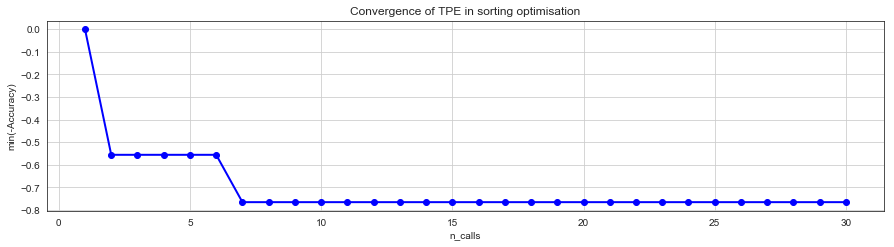

In [11]:
test.plot_convergence()

In [28]:
import spiketoolkit as st

output_folder = 'final_sorted'

sorter = 'herdingspikes'


final_parameters = {}
for i, key in enumerate(r['optimal_params']):
    if type(r['optimal_params']) is dict:
        final_parameters[key] = r['optimal_params'][key][0]
    else:
        final_parameters[key] = r['optimal_params'][i]


SorterClass = st.sorters.sorter_dict[sorter]
my_sorter = SorterClass(recording=recording, output_folder = output_folder)
my_sorter.set_params(**final_parameters)
my_sorter.run()


# Generating new position and neighbor files from data file
# Not Masking any Channels
# Sampling rate: 32000
# Localization On
# Number of recorded channels: 30
# Analysing frames: 9600000; Seconds: 300.0
# Frames before spike in cutout: 6
# Frames after spike in cutout: 32
# tcuts: 51 77
# tInc: 1000000
# Analysing frames from -51 to 1000077  (0.0%)
# Analysing frames from 999949 to 2000077  (10.4%)
# Analysing frames from 1999949 to 3000077  (20.8%)
# Analysing frames from 2999949 to 4000077  (31.2%)
# Analysing frames from 3999949 to 5000077  (41.7%)
# Analysing frames from 4999949 to 6000077  (52.1%)
# Analysing frames from 5999949 to 7000077  (62.5%)
# Analysing frames from 6999949 to 8000077  (72.9%)
# Analysing frames from 7999949 to 9000077  (83.3%)
# Analysing frames from 8999949 to 9600000  (93.8%)
# Detection completed, time taken: 0:00:20.004877
# Time per frame: 0:00:00.002084
# Time per sample: 0:00:00.000069
Loaded 41665 spikes.
Fitting dimensionality reduction using al

[Parallel(n_jobs=24)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=24)]: Done   3 out of  24 | elapsed:    8.6s remaining:  1.0min
[Parallel(n_jobs=24)]: Done  16 out of  24 | elapsed:    9.1s remaining:    4.5s
[Parallel(n_jobs=24)]: Done  24 out of  24 | elapsed:    9.2s finished


Number of estimated units: 29
Saving to /disk/scratch/mhennig/spikeinterface/spikeoptimizer-develop/final_sorted/HS2_sorted.hdf5


29.963556310976855

In [30]:
sorting_extractor = my_sorter.get_result()


In [31]:
sorting_extractor.get_sampling_frequency()

32000.0

In [32]:
sc = st.comparison.compare_sorter_to_ground_truth(sorting_true, sorting_extractor, exhaustive_gt=True)
# why the warning below?

In [33]:
# sc
results = sc.get_performance(method='pooled_with_sum', output='dict')  
results

{'accuracy': 0.7651367715428695,
 'recall': 0.8573721831839108,
 'precision': 0.8767305726763094,
 'false_discovery_rate': 0.12326942732369064,
 'miss_rate': 0.14262781681608916,
 'misclassification_rate': 0.0}

In [38]:
sc.get_performance(method='by_unit', output='dict')  


,accuracy,recall,precision,false_discovery_rate,miss_rate,misclassification_rate
gt_unit_id,,,,,,
1,0.839192,0.926285,0.899247,0.100753,0.073715,0.0
2,0.786187,0.882838,0.877769,0.122231,0.117162,0.0
3,0.842545,0.897331,0.932432,0.067568,0.102669,0.0
4,0.000000,0.000000,NaN,NaN,1.000000,0.0
5,0.760931,0.894787,0.835705,0.164295,0.105213,0.0
6,0.751479,0.897174,0.822302,0.177698,0.102826,0.0
7,0.973376,0.981740,0.991323,0.008677,0.018260,0.0
8,0.745215,0.871815,0.836916,0.163084,0.128185,0.0
9,0.792564,0.875288,0.893459,0.106541,0.124712,0.0
